In [6]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

##1. 이항분포

-> 성공확률이 p면서 N회의 독립 베르누이 시행을 했을 때 성공한 횟수 m이 따르는 이산형 확률분포

-> 사용법: 흡연 여부에 따라 암에 걸릴 확률이 어떻게 변하는지, 가격을 변경하면 상품의 구입률이 변하는지 등

확률질량함수(pmf): 성공횟수, 시행횟수, 성공확률 순으로 입력

In [7]:
#앞이 나올 확률이 50%인 동전을 2번 던져 1번 앞면일 확률
sp.stats.binom.pmf(k=1, n=2, p=0.5)

0.5000000000000002

In [8]:
np.random.seed(1)
#난수 생성: 앞이 나올 확률이 20%인 동전을 10번 던져 앞이 나온 수를 세는 시행 5번
sp.stats.binom.rvs(n=10, p=0.2, size=5)

array([2, 3, 0, 1, 1])

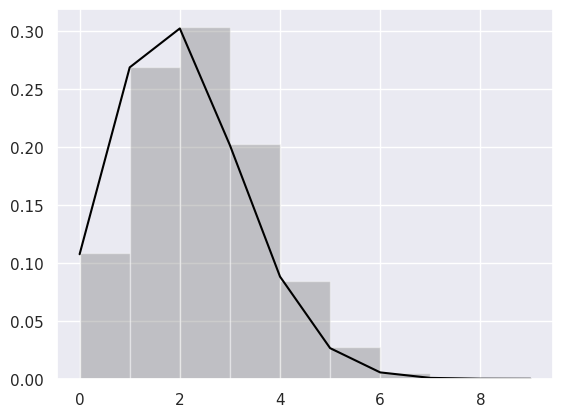

In [9]:
# N=10, p=0.2인 이항분포
binomial=sp.stats.binom(n=10, p=0.2)
#난수
np.random.seed(1)
rvs_binomial=binomial.rvs(size=10000)
#확률밀도함수
m=np.arange(0,10,1)
pmf_binomial =binomial.pmf(k=m)
#난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_binomial, bins=m, kde=False, norm_hist=True, color="gray")
plt.plot(m, pmf_binomial, color="black")

##2. 푸아송 분포

-> 카운트 데이터(1개, 2회 등, 0 이상의 정수)가 따르는 이산형 확률분포

-> 사용법: 낚싯대를 바꾸면 잡아 올리는 물고기 수가 달라지는지, 조사 구획 내의 생물의 개체수가 변하는지 등

-> 푸아송 분포: 성공확률이 한없이 0에 가깝지만 시행횟수가 무한히 많은 이항분포 (물고기는 매우 많고 낚이는 물고기는 매우 적다)

In [10]:
#강도(일이 일어날 횟수에 대한 기댓값)가 5인 푸아송 분포에서 어떤 값 2를 얻는 확률
sp.stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [11]:
#강도가 2인 푸아송 분포를 따르는 난수 5개
np.random.seed(1)
sp.stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

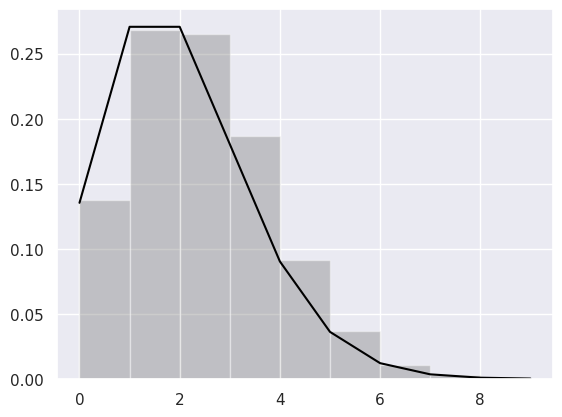

In [13]:
#강도가 2인 푸아송 분포
poisson=sp.stats.poisson(mu=2)
#난수
np.random.seed(1)
rvs_poisson=poisson.rvs(size=10000)
#확률질량함수
pmf_poisson=poisson.pmf(k=m)
#난수의 히스토그램과 확률질량함수 겹쳐서 그리기
sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color="gray")
plt.plot(m, pmf_poisson, color='black')

푸아송 분포와 이항분포의 관계

-> 푸아송 분포는 시행횟수가 매우 많고 성공확률이 매우 낮은 이항분포와 거의 일치

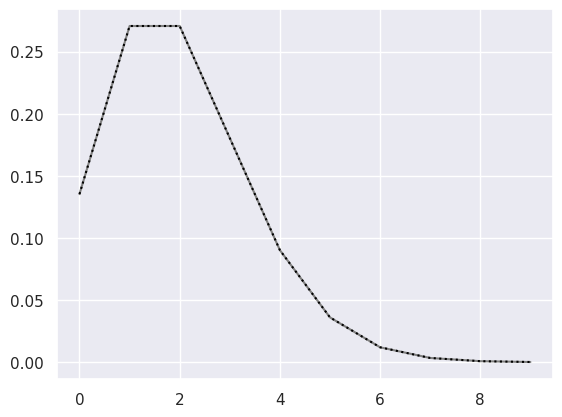

In [14]:
#N이 크고 p가 작은 이항분포
N=100000000
p=0.00000002
binomial_2=sp.stats.binom(n=N, p=p)
#확률질량함수
pmf_binomial_2=binomial_2.pmf(k=m)
#확률질량의 그래프
plt.plot(m, pmf_poisson, color='gray')
plt.plot(m, pmf_binomial_2, color='black', linestyle='dotted')

그 외의 확률분포

1. 음이항분포: 분산이 큰 푸아송 분포(과분산)
2. 감마분포: 0 이상의 값을 취하는 연속형 확률변수, 분산값도 평균값에 따라 변함(정규분포와 차이점)